In [1]:
import pandas as pd


In [8]:
path = 'C:/Users/dsadm/Desktop/Inteligência Artificial/IABD/codigos/Aula09-TA-18.09.2023/Social_Network_Ads.csv'
df = pd.read_csv(path)

In [16]:
df.head()

,Usuario ID,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dic = {"User ID": "Usuario ID", "Gender": "Genero","Age":"Idade","EstimatedSalary": "Salario Estimado","Purchased":"Comprou"}

In [14]:
df.rename(columns=dic,inplace=True)

In [17]:
# import bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
df.isnull() #retorna valores nulos

In [ ]:
df.isna() #retorna valores que não são numeros

In [21]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [22]:
#importa biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split


In [24]:
#divisao do dataset
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.3,random_state=3)

In [25]:
#Padronização dos dados
sc =StandardScaler()
X_treino = sc.fit_transform(X_treino) #normalizo e crio o modelo
X_teste = sc.transform(X_teste) #normalizo 

In [27]:
#Criando o classificador
algoritmo = SVC(kernel='linear',random_state=3)
algoritmo.fit(X_treino,y_treino)

SVC(kernel='linear', random_state=3)

In [ ]:
#Predição
y_pred = algoritmo.predict(X_teste)
y_pred

In [29]:
#Gerando a matriz de confusão
cm = confusion_matrix(y_teste,y_pred)
print(cm)

[[72  6]
 [15 27]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_17188\4208416737.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


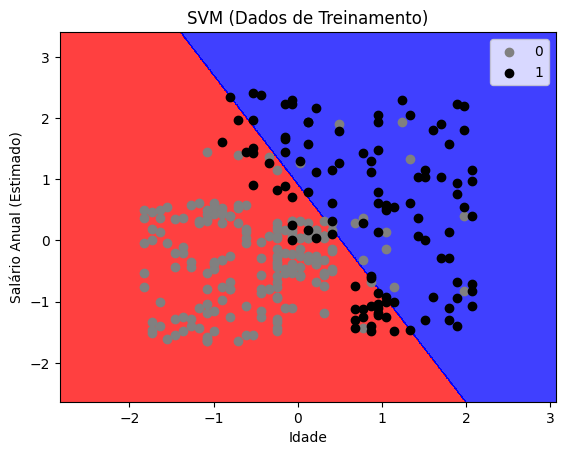

In [36]:
_X, _y = X_treino, y_treino
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_17188\785051974.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


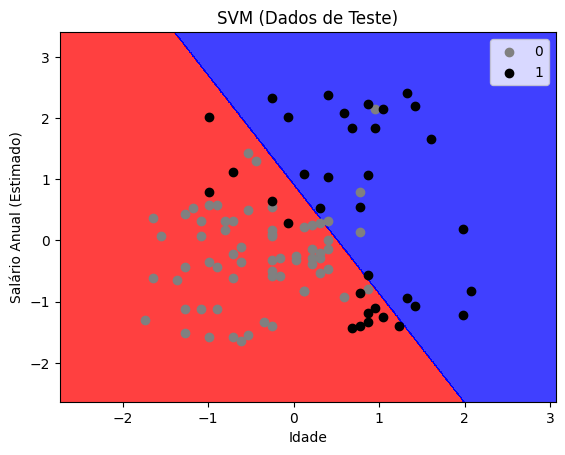

In [37]:
# Visualizando os resultados dos dados de teste:
_X, _y = X_teste,y_teste
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

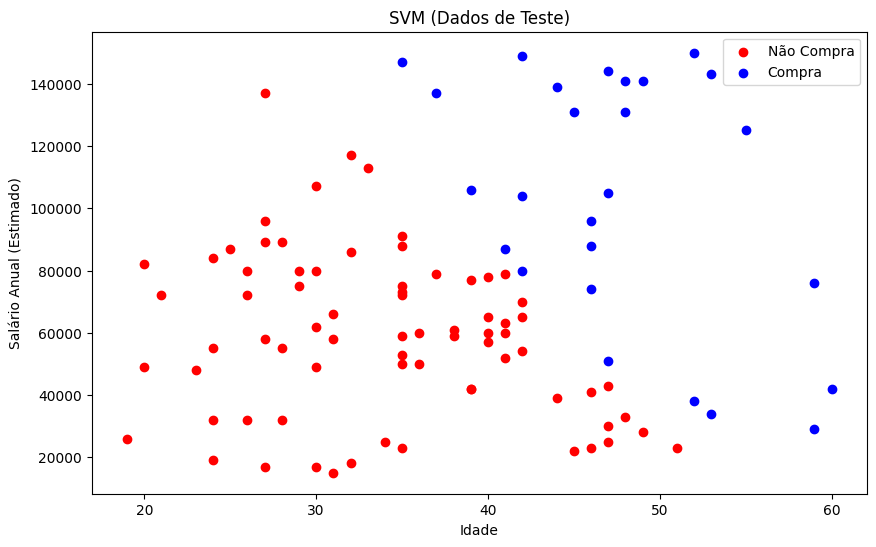

In [35]:
#Aplicando transformação nos dados
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

# Divisão da amostra
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=3)

# Padronização dos dados
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

# Treinamento do modelo SVM
algoritmo = SVC(kernel='linear', random_state=3)
algoritmo.fit(X_treino, y_treino)

# Previsão dos resultados
y_prev = algoritmo.predict(X_teste)

# Inversão da escala para os dados de teste
X_teste_inverse = sc.inverse_transform(X_teste)

# Visualização dos resultados dos dados de teste
plt.figure(figsize=(10, 6))

# Pontos para as duas classes
plt.scatter(X_teste_inverse[y_prev == 0, 0], X_teste_inverse[y_prev == 0, 1], c='red', label='Não Compra')
plt.scatter(X_teste_inverse[y_prev == 1, 0], X_teste_inverse[y_prev == 1, 1], c='blue', label='Compra')

plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()